<a href="https://colab.research.google.com/github/DimaKav/DS-Unit-2-Sprint-4-Model-Validation/blob/master/module-2-validate-classification-problems/Model_validation_assignment_partII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/master/module-1-begin-modeling-process/bank-marketing/train_features.csv
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/master/module-1-begin-modeling-process/bank-marketing/train_labels.csv
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/master/module-1-begin-modeling-process/bank-marketing/test_features.csv
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/master/module-1-begin-modeling-process/bank-marketing/sample_submission.csv

--2019-03-05 22:08:04--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/master/module-1-begin-modeling-process/bank-marketing/train_features.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3833210 (3.7M) [text/plain]
Saving to: ‘train_features.csv.1’

train_features.csv. 100%[===================>]   3.66M  --.-KB/s    in 0.07s   

2019-03-05 22:08:04 (54.4 MB/s) - ‘train_features.csv.1’ saved [3833210/3833210]

--2019-03-05 22:08:05--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/master/module-1-begin-modeling-process/bank-marketing/train_labels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.gi

In [2]:
import pandas as pd

train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')
test_features = pd.read_csv('test_features.csv')
sample_submission = pd.read_csv('sample_submission.csv')

train_features.shape, train_labels.shape, test_features.shape, sample_submission.shape



((30891, 20), (30891, 2), (10297, 20), (10297, 2))

In [3]:
train_features.sample(5)

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
6012,17936,51,technician,married,professional.course,no,no,yes,telephone,may,thu,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
27147,26305,29,blue-collar,married,basic.9y,no,no,no,cellular,may,wed,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1
2605,17673,46,housemaid,married,basic.4y,no,no,no,telephone,may,tue,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0
28405,28987,38,blue-collar,married,basic.9y,no,no,no,cellular,apr,fri,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
29562,44025,38,blue-collar,married,unknown,no,yes,yes,cellular,jul,wed,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1


# Basic baseline

In [0]:
y_train = train_labels['y']
X_train = train_features.drop(columns='id')
X_test  = test_features.drop(columns='id')

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((23168, 19), (7723, 19), (23168,), (7723,))

In [6]:
y_train.value_counts(normalize=True)

0    0.886481
1    0.113519
Name: y, dtype: float64

In [0]:
majority_class = 0
y_pred = [majority_class] * len(y_val)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

0.8899391428201476

In [9]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.5

In [10]:
X_train.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [11]:
import numpy as np
X_train.describe(include=np.number)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000
mean,39.971383,2.561335,961.883287,0.175112,0.066212,93.570047,-40.500708,3.603619,5166.422298
std,10.398425,2.724029,188.362863,0.496223,1.579743,0.580761,4.661168,1.741769,72.536491
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
X_train.describe(exclude=np.number)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,23168,23168,23168,23168,23168,23168,23168,23168,23168,23168
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,5858,13982,6866,18289,12132,19073,14717,7788,4780,19947


In [0]:
X_train_numeric = X_train.select_dtypes(np.number)
X_val_numeric = X_val.select_dtypes(np.number)

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train_numeric, y_train)

y_pred = model.predict_proba(X_val_numeric)[:, 1]
roc_auc_score(y_val, y_pred)

0.7464599755222909

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_val_scaled = scaler.transform(X_val_numeric)

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict_proba(X_val_scaled)[:, 1]
roc_auc_score(y_val, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


0.7539784835802501

In [28]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    StandardScaler(), 
    LogisticRegression(solver='lbfgs', max_iter=1000)
)

pipeline.fit(X_train_numeric, y_train)

y_pred = pipeline.predict_proba(X_val_numeric)[:, 1]
roc_auc_score(y_val, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.7539784835802501

In [17]:
X_train.select_dtypes(exclude=np.number).nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
dtype: int64

In [18]:
!pip install category_encoders

    100% |████████████████████████████████| 61kB 3.9MB/s 


In [19]:
!conda install -c conda-forge category_encoders

/bin/bash: conda: command not found


In [20]:
X_train.shape, y_train.shape

((23168, 19), (23168,))

In [21]:
X_train['default'].value_counts()

no         18289
unknown     4877
yes            2
Name: default, dtype: int64

In [29]:
import category_encoders as ce

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    StandardScaler(), 
    LogisticRegression(solver='lbfgs', max_iter=1000)
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.7880597564211194

In [23]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = add_constant(X_train_numeric)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
[c+': '+str(round(v,2)) for c, v in zip(X.columns, vif)]

['const: 529394.71',
 'age: 1.02',
 'campaign: 1.03',
 'pdays: 1.62',
 'previous: 1.79',
 'emp.var.rate: 33.28',
 'cons.price.idx: 6.39',
 'cons.conf.idx: 2.67',
 'euribor3m: 64.86',
 'nr.employed: 31.88']

Multicolinearity in euriborm3m and nr.employed

Submission to the Kaggle:

In [24]:
submission = sample_submission.copy()
submission['y'] = pipeline.predict_proba(X_test)[:, 1:]
submission.to_csv('submission-001.csv', index=False)

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [25]:
submission.sample(5)

,id,y
10294,10660,0.069296
5866,17176,0.023763
4123,39194,0.211691
1628,15969,0.053790
9772,12849,0.044021


# Baseline with cross-validation and independenet test set


In [30]:
# Imports
%matplotlib inline
import warnings
import category_encoders as ce
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Load data
X_train = pd.read_csv('train_features.csv').drop(columns='id')
X_test  = pd.read_csv('test_features.csv').drop(columns='id')
y_train = pd.read_csv('train_labels.csv')['y']
sample_submission = pd.read_csv('sample_submission.csv')

# Make pipeline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    StandardScaler(), 
    LogisticRegression(solver='lbfgs', max_iter=1000)
)

# Cross-validation with training data
cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=10, n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.3s finished


array([0.77295183, 0.78574708, 0.78036636, 0.79742952, 0.79020263,
       0.79837252, 0.79259604, 0.80331817, 0.77434981, 0.78202959])

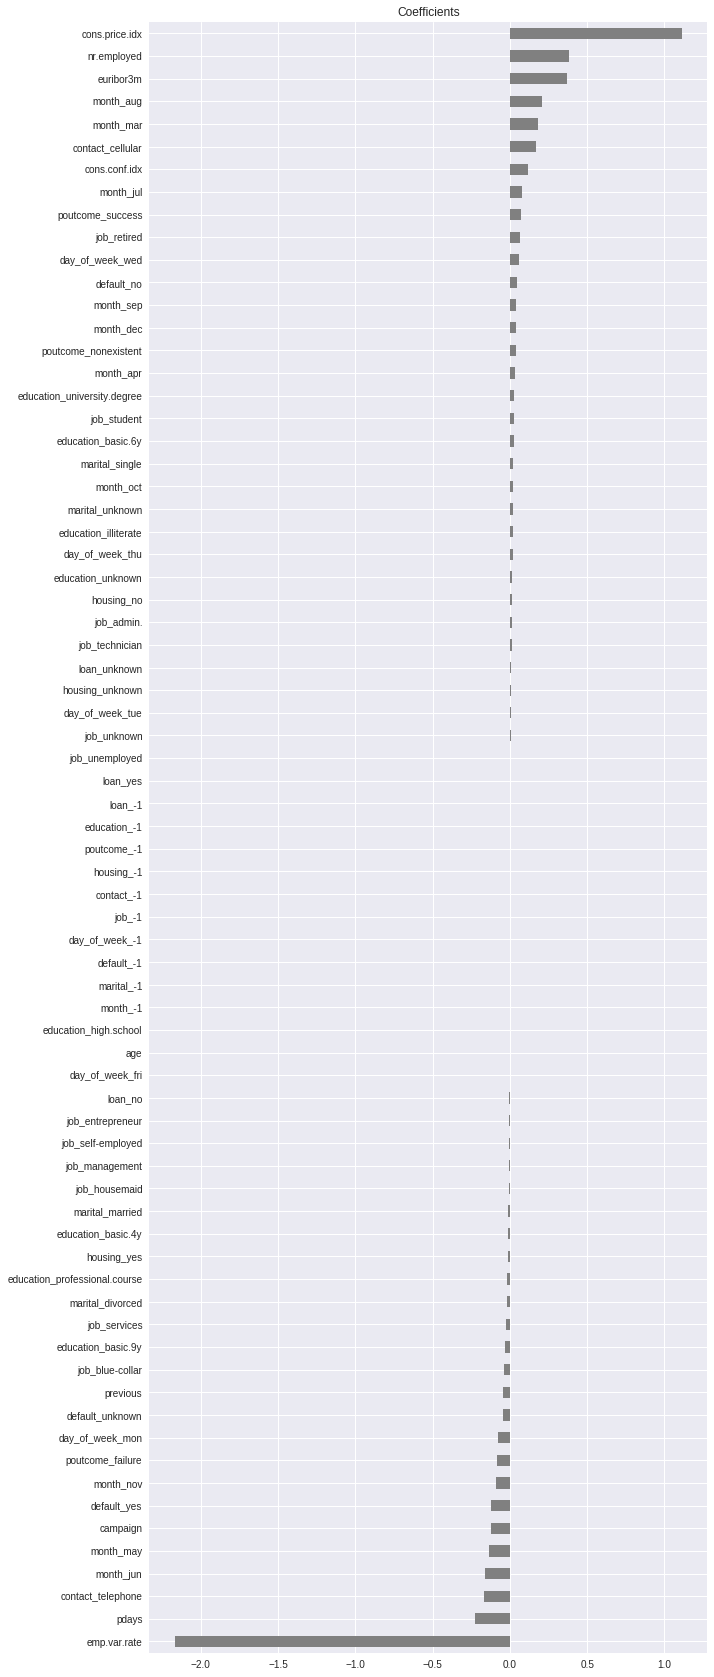

In [31]:
# (Re)fit on training data
pipeline.fit(X_train, y_train)

# Generate submission
submission = sample_submission.copy()
submission['y'] = pipeline.predict_proba(X_test)[:, 1]
submission.to_csv('submission-001.csv', index=False)

# Visualize coefficients
plt.figure(figsize=(10,30))
plt.title('Coefficients')
coefficients = pipeline.named_steps['logisticregression'].coef_[0]
feature_names = pipeline.named_steps['onehotencoder'].transform(X_train).columns
pd.Series(coefficients, feature_names).sort_values().plot.barh(color='gray');

# Feature engineering

In [81]:
# Reload the data...
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')
test_features = pd.read_csv('test_features.csv')

train_features.shape, train_labels.shape, test_features.shape

((30891, 20), (30891, 2), (10297, 20))

In [82]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30891 entries, 0 to 30890
Data columns (total 20 columns):
id                30891 non-null int64
age               30891 non-null int64
job               30891 non-null object
marital           30891 non-null object
education         30891 non-null object
default           30891 non-null object
housing           30891 non-null object
loan              30891 non-null object
contact           30891 non-null object
month             30891 non-null object
day_of_week       30891 non-null object
campaign          30891 non-null int64
pdays             30891 non-null int64
previous          30891 non-null int64
poutcome          30891 non-null object
emp.var.rate      30891 non-null float64
cons.price.idx    30891 non-null float64
cons.conf.idx     30891 non-null float64
euribor3m         30891 non-null float64
nr.employed       30891 non-null float64
dtypes: float64(5), int64(5), object(10)
memory usage: 4.7+ MB


In [83]:
train_features['job'].value_counts(normalize=True)

admin.           0.252565
blue-collar      0.224920
technician       0.164125
services         0.096824
management       0.071445
retired          0.041857
entrepreneur     0.034476
self-employed    0.033602
housemaid        0.025800
unemployed       0.024667
student          0.021560
unknown          0.008158
Name: job, dtype: float64

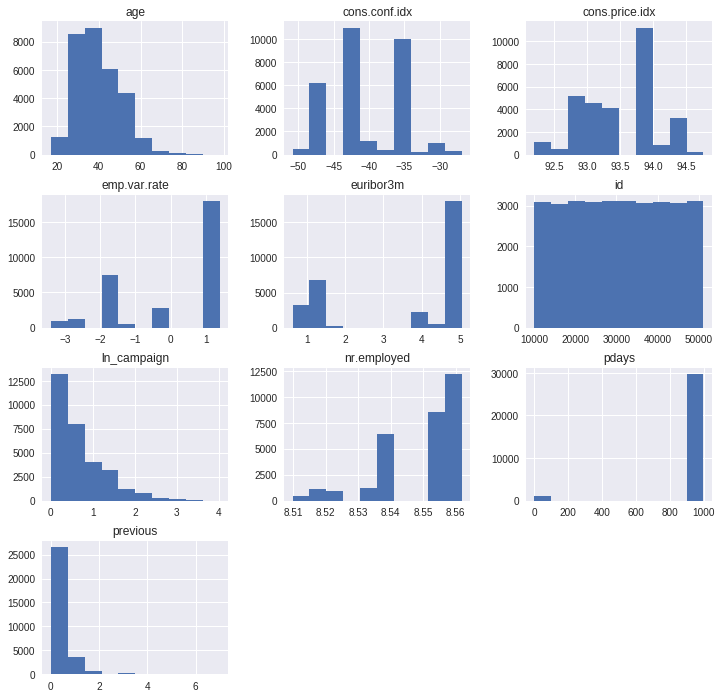

In [87]:
train_features.hist(figsize=(12,12));

campaign and looks like it could use log transform

In [0]:
train_features['ln_campaign'] = np.log(train_features['campaign'])
test_features['ln_campaign'] = np.log(test_features['campaign'])
train_features.drop('campaign',inplace=True,axis=1)
test_features.drop('campaign',inplace=True,axis=1)

Lets combine some categorical features instead

In [0]:
#Combining entrepreneurs and self-employed into self-employed
test_features.job.replace(['entrepreneur', 'self-employed'], 'self-employed', inplace=True)
train_features.job.replace(['entrepreneur', 'self-employed'], 'self-employed', inplace=True)

#Combining administrative and management jobs into admin_management
test_features.job.replace(['admin.', 'management'], 'administration_management', inplace=True)
train_features.job.replace(['admin.', 'management'], 'administration_management', inplace=True)

#Combining blue-collar and tecnician jobs into blue-collar
test_features.job.replace(['blue-collar', 'technician'], 'blue-collar', inplace=True)
train_features.job.replace(['blue-collar', 'technician'], 'blue-collar', inplace=True)

#Combining retired and unemployed into no_active_income
test_features.job.replace(['retired', 'unemployed'], 'no_active_income', inplace=True)
train_features.job.replace(['retired', 'unemployed'], 'no_active_income', inplace=True)

#Combining services and housemaid into services
test_features.job.replace(['services', 'housemaid'], 'services', inplace=True)
train_features.job.replace(['services', 'housemaid'], 'services', inplace=True)

#Combining single and divorced into single
test_features.marital.replace(['single', 'divorced'], 'single', inplace=True)
train_features.marital.replace(['single', 'divorced'], 'single', inplace=True)

#Combining basic school degrees
test_features.education.replace(['basic.9y', 'basic.6y', 'basic.4y'], 'basic_school', inplace=True)
train_features.education.replace(['basic.9y', 'basic.6y', 'basic.4y'], 'basic_school', inplace=True)

In [0]:
# Delete duration column

del train_features['default']
del test_features['default']

Drop features with high multi colinearity

In [113]:
X = add_constant(X_train_numeric)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
[c+': '+str(round(v,2)) for c, v in zip(X.columns, vif)]

['const: 6114033.0',
 'age: 1.02',
 'pdays: 1.63',
 'previous: 1.82',
 'emp.var.rate: 23.97',
 'cons.price.idx: 5.55',
 'cons.conf.idx: 1.32',
 'nr.employed: 13.11',
 'ln_campaign: 1.03']

In [0]:
train_features.drop('euribor3m',axis=1,inplace=True)
test_features.drop('euribor3m',axis=1,inplace=True)

Let's see if the score improves with the new features

In [116]:
y_train = train_labels['y']
X_train = train_features.drop(columns='id')
X_test  = test_features.drop(columns='id')

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42)

majority_class = 0
y_pred = [majority_class] * len(y_val)

X_train_numeric = X_train.select_dtypes(np.number)
X_val_numeric = X_val.select_dtypes(np.number)

import category_encoders as ce

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    StandardScaler(), 
    LogisticRegression(solver='lbfgs', class_weight='balanced')
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8034149827543414